In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
# from tvb.simulator.models import wilson_cowan
from tvb.simulator.simulator import *
from tvb.simulator import noise
from tvb.simulator.lab import *

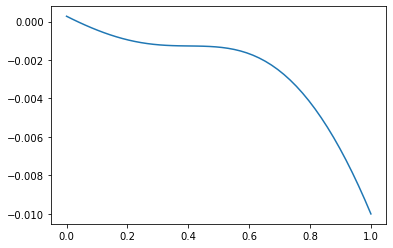

In [9]:
rww = models.ReducedWongWang(a=np.array([0.27]), w=np.array([1.0]), I_o=np.array([0.3]))
S = np.linspace(0, 1, 50).reshape((1, -1, 1))
C = S * 0.0
dS = rww.dfun(S, C)

plt.figure()
plt.plot(S.flat, dS.flat)

In [10]:
S.shape[:-1]

(1, 50)

In [11]:
S2 = np.append(S, S, axis=0)
C2 = S2 * 0.0

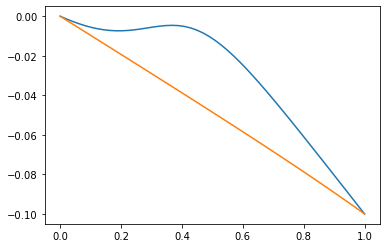

In [24]:
wc = models.WilsonCowan()
dS = wc.dfun(S2, C2)
plt.figure()
plt.plot(S2[0, :].flat, dS[0, :].flat)
plt.plot(S2[1, :].flat, dS[1, :].flat)

In [13]:
dS[1, :].shape

(50, 1)

In [14]:
S.shape

(1, 50, 1)

In [15]:
sc_0 = connectivity.Connectivity.from_file(source_file='./data/connectivity_76.zip')

  ERROR  Could not import tvb_data Python module for default data-set!
Traceback (most recent call last):
  File "/Users/yilinliu/anaconda3/lib/python3.7/site-packages/tvb/basic/readers.py", line 226, in try_get_absolute_path
    module_import = importlib.import_module(relative_module)
  File "/Users/yilinliu/anaconda3/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 953, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 965, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'tvb_data'
W

In [16]:
sc_0

,value
Number of connections,0
Number of regions,0
Undirected,False
"areas [min, median, max]","[0, 2580.89, 10338.2]"
areas dtype,float64
areas shape,"(76,)"
"tract_lengths (connections) [min, median, max]","[0, 55.8574, 138.454]"
"tract_lengths [min, median, max]","[0, 71.6635, 153.486]"
"tract_lengths-non-zero [min, median, max]","[4.93328, 74.0646, 153.486]"
"weights [min, median, max]","[0, 0, 3]"


In [18]:
wc

,value
"P [min, median, max]","[0, 0, 0]"
P dtype,float64
P shape,"(1,)"
"Q [min, median, max]","[0, 0, 0]"
Q dtype,float64
Q shape,"(1,)"
Type,WilsonCowan
"a_e [min, median, max]","[1.2, 1.2, 1.2]"
a_e dtype,float64
a_e shape,"(1,)"


   INFO  history has n_time=4192 n_cvar=2 n_node=76 n_nmode=1, requires 2.69 MB
   INFO  sparse history has n_nnzw=1560, i.e. 27.01 % sparse
WARNING  random_state supplied for non-stochastic integration


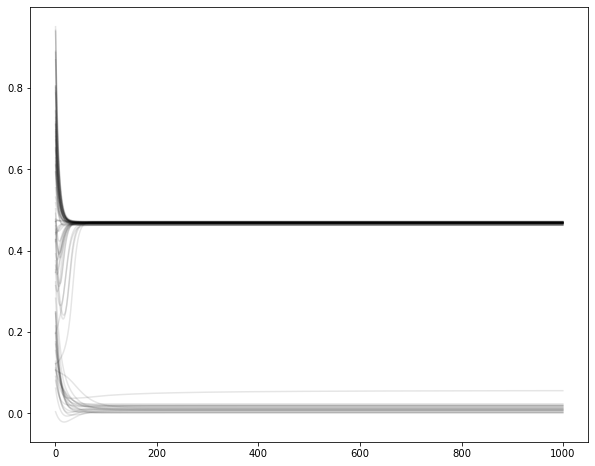

In [20]:
sim = simulator.Simulator(
    model=wc,
    connectivity=sc_0,
    coupling=coupling.Linear(a=np.array([0.5 / 50.0])),
#     integrator=integrators.EulerStochastic(dt=0.1, noise=noise.Additive(nsig=np.array([1e-5]))),
    integrator=integrators.EulerDeterministic(),
#     integrator=integrators.HeunDeterministic(dt=2**-4),
    monitors=(monitors.TemporalAverage(period=1.),),
    simulation_length=1e3
).configure()

(time, data), = sim.run()

plt.figure(figsize=(10, 8))
plt.plot(time, data[:, 0, :, 0], 'k', alpha=0.1);

   INFO  White noise configured with dt=0.1
   INFO  history has n_time=513 n_cvar=2 n_node=76 n_nmode=1, requires 0.56 MB
   INFO  sparse history has n_nnzw=1560, i.e. 27.01 % sparse


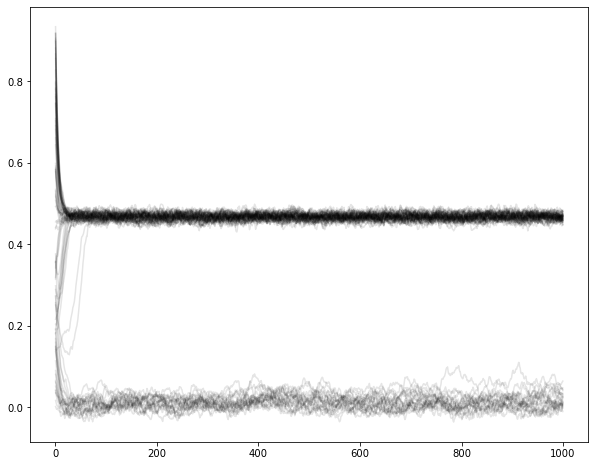

In [21]:
sim = simulator.Simulator(
    model=wc,
    connectivity=sc_0,
    coupling=coupling.Linear(a=np.array([0.5 / 50.0])),
    integrator=integrators.EulerStochastic(dt=0.1, noise=noise.Additive(nsig=np.array([1e-5]))),
#     integrator=integrators.EulerDeterministic(),
#     integrator=integrators.HeunDeterministic(dt=2**-4),
    monitors=(monitors.TemporalAverage(period=1.),),
    simulation_length=1e3
).configure()

(time, data), = sim.run()

plt.figure(figsize=(10, 8))
plt.plot(time, data[:, 0, :, 0], 'k', alpha=0.1);

In [69]:
data.shape

(100, 1, 76, 1)

In [70]:
data[:, 0, :, 0].shape

(100, 76)